## Init notebook

This is run once.

## Preliminaries

In [18]:
import quantus

In [19]:
# Import libraries.
from IPython.display import clear_output
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.font_manager as font_manager
import warnings
import torch
import captum
import torchvision
import wandb
from tqdm import tqdm
import os
import json
import time

from zennit import attribution as zattr
from zennit import image as zimage
from zennit import composites as zcomp

from models import models
from data import dataloaders, datasets, transforms
from attribution import zennit_utils as zutils
from utils import arguments as argument_utils
from main import *

try:
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print('Using device:', torch.cuda.get_device_name(0))
except:
    pass

Using device: NVIDIA TITAN RTX


## Experiment



In [20]:
save_path = "/media/lweber/f3ed2aae-a7bf-4a55-b50d-ea8fb534f1f5/mprt/testing-stuff"
dataset_name = "imagenet"
data_path = "/media/lweber/f3ed2aae-a7bf-4a55-b50d-ea8fb534f1f5/Datasets/imagenet"
labelmap_path = "label_map_imagenet.json"
model_names = ["vgg16"]
xai_methodnames = ["gradient"]#, "lrp-epsilon", "lrp-zplus", "guided-backprop", "grad-cam"]
eval_metricnames = ["emprt"] #smprt
nr_test_samples = 100
xai_n_noisedrawss = [1, 20, 50, 100]
xai_noiselevel = 0.01
eval_layerorders = ["bottom_up"]#, "top_down"]
eval_normalise = True
use_cpu = False
batch_size = 32
shuffle = False
wandb_key = "343d642ebb6021c0303b16436ddf0be59cb0696f"
wandb_projectname = "denoise-sanity-checks-4"
use_wandb = True

In [21]:
for model_name in model_names:
    for xai_methodname in xai_methodnames:
        for eval_metricname in eval_metricnames:
            for eval_layerorder in eval_layerorders:
                for xai_n_noisedraws in xai_n_noisedrawss:

                    evaluate_randomization(
                        save_path,
                        dataset_name,
                        data_path,
                        labelmap_path,
                        model_name,
                        xai_methodname,
                        eval_metricname,
                        nr_test_samples,
                        xai_n_noisedraws,
                        xai_noiselevel,
                        eval_layerorder,
                        eval_normalise,
                        use_cpu,
                        batch_size,
                        shuffle,
                        wandb_key,
                        wandb_projectname,
                        use_wandb
                    )

Saving arguments...
Preparing device and transforms...
Preparing datasets...
DATA_ROOT /media/lweber/f3ed2aae-a7bf-4a55-b50d-ea8fb534f1f5/Datasets/imagenet/val
Number of Samples in Dataset: 1000
Reduced of Samples in Dataset: 100
Preparing dataloaders...
Warnings and information:
 (1) The e M P R T metric is likely to be sensitive to the choice of similarity metric 'similarity_func' and the order of the layer randomisation 'layer_order'.  
 (2) If attributions are normalised or their absolute values are taken it may destroy or skew information in the explanation and as a result, affect the overall evaluation outcome.
 (3) Make sure to validate the choices for hyperparameters of the metric (by calling .get_params of the metric instance).
 (4) For further information, see original publication: Adebayo, J., Gilmer, J., Muelly, M., Goodfellow, I., Hardt, M., and Kim, B. 'Sanity Checks for Saliency Maps.' arXiv preprint, arXiv:1810.073292v3 (2018).
 (5) To disable these warnings set 'disabl

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


mean-score,█▂▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mean-score,0.28092


Evaluating Batch 1/4


/home/lweber/work-code/Quantus/eMPRT/scripts/quantus/functions/explanation_func.py:117: UserWarning: Using quantus 'explain' function as an explainer without specifying 'method' (string) in kwargs will produce a vanilla 'Gradient' explanation.

  warnings.warn(


Evaluating Batch 2/4
Evaluating Batch 3/4
Evaluating Batch 4/4
Saving arguments...
Preparing device and transforms...
Preparing datasets...
DATA_ROOT /media/lweber/f3ed2aae-a7bf-4a55-b50d-ea8fb534f1f5/Datasets/imagenet/val
Number of Samples in Dataset: 1000
Reduced of Samples in Dataset: 100
Preparing dataloaders...


/home/lweber/work-code/Quantus/quantus/venv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/lweber/work-code/Quantus/quantus/venv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Warnings and information:
 (1) The e M P R T metric is likely to be sensitive to the choice of similarity metric 'similarity_func' and the order of the layer randomisation 'layer_order'.  
 (2) If attributions are normalised or their absolute values are taken it may destroy or skew information in the explanation and as a result, affect the overall evaluation outcome.
 (3) Make sure to validate the choices for hyperparameters of the metric (by calling .get_params of the metric instance).
 (4) For further information, see original publication: Adebayo, J., Gilmer, J., Muelly, M., Goodfellow, I., Hardt, M., and Kim, B. 'Sanity Checks for Saliency Maps.' arXiv preprint, arXiv:1810.073292v3 (2018).
 (5) To disable these warnings set 'disable_warnings' = True when initialising the metric.



wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


mean-score,▂▁▂▅▅▆▆▆▇████████
mean-score,3.64358


Evaluating Batch 1/4


/home/lweber/work-code/Quantus/eMPRT/scripts/quantus/functions/explanation_func.py:117: UserWarning: Using quantus 'explain' function as an explainer without specifying 'method' (string) in kwargs will produce a vanilla 'Gradient' explanation.

  warnings.warn(


Evaluating Batch 2/4
Evaluating Batch 3/4
Evaluating Batch 4/4
Saving arguments...
Preparing device and transforms...
Preparing datasets...
DATA_ROOT /media/lweber/f3ed2aae-a7bf-4a55-b50d-ea8fb534f1f5/Datasets/imagenet/val
Number of Samples in Dataset: 1000
Reduced of Samples in Dataset: 100
Preparing dataloaders...


/home/lweber/work-code/Quantus/quantus/venv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/lweber/work-code/Quantus/quantus/venv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Warnings and information:
 (1) The e M P R T metric is likely to be sensitive to the choice of similarity metric 'similarity_func' and the order of the layer randomisation 'layer_order'.  
 (2) If attributions are normalised or their absolute values are taken it may destroy or skew information in the explanation and as a result, affect the overall evaluation outcome.
 (3) Make sure to validate the choices for hyperparameters of the metric (by calling .get_params of the metric instance).
 (4) For further information, see original publication: Adebayo, J., Gilmer, J., Muelly, M., Goodfellow, I., Hardt, M., and Kim, B. 'Sanity Checks for Saliency Maps.' arXiv preprint, arXiv:1810.073292v3 (2018).
 (5) To disable these warnings set 'disable_warnings' = True when initialising the metric.



wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


mean-score,▂▁▂▅▆▆▆▆▇███▇████
mean-score,3.45186


Evaluating Batch 1/4


/home/lweber/work-code/Quantus/eMPRT/scripts/quantus/functions/explanation_func.py:117: UserWarning: Using quantus 'explain' function as an explainer without specifying 'method' (string) in kwargs will produce a vanilla 'Gradient' explanation.

  warnings.warn(


Evaluating Batch 2/4
Evaluating Batch 3/4
Evaluating Batch 4/4
Saving arguments...
Preparing device and transforms...
Preparing datasets...
DATA_ROOT /media/lweber/f3ed2aae-a7bf-4a55-b50d-ea8fb534f1f5/Datasets/imagenet/val
Number of Samples in Dataset: 1000
Reduced of Samples in Dataset: 100
Preparing dataloaders...


/home/lweber/work-code/Quantus/quantus/venv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/lweber/work-code/Quantus/quantus/venv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Warnings and information:
 (1) The e M P R T metric is likely to be sensitive to the choice of similarity metric 'similarity_func' and the order of the layer randomisation 'layer_order'.  
 (2) If attributions are normalised or their absolute values are taken it may destroy or skew information in the explanation and as a result, affect the overall evaluation outcome.
 (3) Make sure to validate the choices for hyperparameters of the metric (by calling .get_params of the metric instance).
 (4) For further information, see original publication: Adebayo, J., Gilmer, J., Muelly, M., Goodfellow, I., Hardt, M., and Kim, B. 'Sanity Checks for Saliency Maps.' arXiv preprint, arXiv:1810.073292v3 (2018).
 (5) To disable these warnings set 'disable_warnings' = True when initialising the metric.



wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


mean-score,▂▁▁▅▅▆▆▆▇██▇▇████
mean-score,3.41257


Evaluating Batch 1/4


/home/lweber/work-code/Quantus/eMPRT/scripts/quantus/functions/explanation_func.py:117: UserWarning: Using quantus 'explain' function as an explainer without specifying 'method' (string) in kwargs will produce a vanilla 'Gradient' explanation.

  warnings.warn(


Evaluating Batch 2/4
Evaluating Batch 3/4
Evaluating Batch 4/4


In [22]:
os.environ["WANDB_API_KEY"] = "343d642ebb6021c0303b16436ddf0be59cb0696f"
wandb_projectname = "denoise-sanity-checks-4"
jsonsavepath = "/media/lweber/f3ed2aae-a7bf-4a55-b50d-ea8fb534f1f5/mptc/eMPRT-sMPRT-scores-from-wandb.json"
figurepath = "/media/lweber/f3ed2aae-a7bf-4a55-b50d-ea8fb534f1f5/mptc/figures/raw-plots-sMPRT-eMPRT-tmp"
redownload_results = True

#exclude_filter = {}
exclude_filter = {"xai_methodname": "grad-cam"}

os.makedirs(figurepath, exist_ok=True)

def wandb_summary_to_dict(summary):
    """
    turns the weird nected dict-like summary data structure used by wandb into a standard nested python dict
    recursive function.
    """
    if not isinstance(summary, wandb.sdk.wandb_summary.SummaryDict) and not isinstance(summary, wandb.old.summary.SummarySubDict):
        return summary

    if "_type" in summary.keys() and "value" in summary.keys():
        return wandb_summary_to_dict(summary["value"])

    newsummary = {}
    for k, v in summary.items():
        newsummary[k] = wandb_summary_to_dict(v)

    return newsummary

def nested_config_to_flat(prefix, config, newconfig):
    """
    turns a nested config into a flat config
    """
    if not isinstance(config, dict):
        newconfig[prefix] = config
        return None

    if newconfig is None:
        newconfig = {}
        for k, v in config.items():
            nested_config_to_flat(k, v, newconfig)
        return newconfig

    else:
        for k, v in config.items():
            _ = nested_config_to_flat(f"{prefix}.{k}", v, newconfig)
        return None

# Get all results from wandb
if not os.path.exists(jsonsavepath) or redownload_results:
    print("Downloading Results from wandb...")
    scores = []
    api = wandb.Api()
    entity, project = "leanderweber", wandb_projectname  # set to your entity and project 
    runs = api.runs(entity + "/" + project) 
    with tqdm(total=len(runs)) as pbar:
        for run in runs: 
            # .summary contains the output keys/values for metrics like accuracy.
            #  We call ._json_dict to omit large files 
            config = {k: v for k,v in run.config.items() if not k.startswith('_')}
            if all([config[s] != v for s, v in exclude_filter.items()]):
                summary = run.summary
                if "scores" in summary.keys():
                    dictsummary = wandb_summary_to_dict(summary["scores"])
                    newconfig = nested_config_to_flat(None, config, None)
                    scores.append((newconfig, dictsummary))

            pbar.update(1)

    with open(jsonsavepath, "w") as jsonfile:
        json.dump(scores, jsonfile)

else:
    with open(jsonsavepath, "r") as jsonfile:
        scores = json.load(jsonfile)


100%|██████████| 8/8 [00:00<00:00, 4758.14it/s]


In [23]:
# General Plot Config
mpl.rcParams['font.family']='serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
mpl.rcParams['font.serif']=cmfont.get_name()
mpl.rcParams['mathtext.fontset']='cm'
mpl.rcParams['axes.unicode_minus']=False
plt.rcParams.update({'font.size': 15})
palette = cm.get_cmap("tab20")(np.linspace(0, 1, 20))
std_alpha = 0.2
linewidth = 2.5

# Beautification Things
LAYER_ORDER_MAP = {
    "top_down": "top-down", 
    "bottom_up": "bottom_up"
    }
METHOD_MAP = {
    "model": "Model Accuracy",
    "gradient": "Saliency",
    "gradient-noabs": "Gradient", #TODO @Anna you should change this one since you have both gradient and saliency in your plots
    "grad-cam": "GradCAM",
    "smoothgrad": "SmoothGrad",
    "intgrad": "IntGrad",
    "lrp-epsilon": r"LRP-$\varepsilon$", 
    "lrp-zplus": r"LRP-$z^+$", 
    "guided-backprop": "Guided Backprop", 
    "random": "Random Attribution"
}
COLOR_MAP = {
    "model": "black",
    "gradient": palette[1],
    "gradient-noabs": palette[2],
    "grad-cam": palette[3],
    "smoothgrad": palette[4],
    "intgrad": palette[5],
    "lrp-epsilon": palette[6],
    "lrp-zplus": palette[7],
    "guided-backprop": palette[8],
    "random": palette[9],
}
LINESTYLE_ORDER = ["dashed", "solid"]

# Setting up grouping variables etc. for plots
between_plot_filter = ["eval_layer_order", "model_name", "metric_kwargs.normalise", "xai_noiselevel"]
within_plot_filter = ["xai_methodname"]

print("Setting up filters...")
between_plot_filters = []
within_plot_filters = []
for config, _ in scores:
    duplicate = False
    for fil in between_plot_filters:
        if all([config[filtered_category] == fil[filtered_category] for filtered_category in between_plot_filter]):
            duplicate=True
    if not duplicate:
        between_plot_filters.append({filtered_category: config[filtered_category] for filtered_category in between_plot_filter})

    duplicate = False
    for fil in within_plot_filters:
        if all([config[filtered_category] == fil[filtered_category] for filtered_category in within_plot_filter]):
            duplicate=True
    if not duplicate:
        within_plot_filters.append({filtered_category: config[filtered_category] for filtered_category in within_plot_filter})

Setting up filters...


/tmp/ipykernel_1987924/1748031411.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  palette = cm.get_cmap("tab20")(np.linspace(0, 1, 20))


In [29]:
def filterequal(value, filtervalue):
    if isinstance(filtervalue, list):
        return value in filtervalue

    return value == filtervalue

def select_runs(runs, filter):
    return [(c, r) for c, r in runs if all([filterequal(c[filtered_category], filter[filtered_category]) for filtered_category in filter.keys()])]

def labelsorter(label, noisedraw_vals=None):

    if noisedraw_vals is not None:
        max_noisedraw_val = np.amax(noisedraw_vals)

        for m, method in enumerate(METHOD_MAP.values()):
            if method in label:
                for noisedraw_val in noisedraw_vals:
                    if str(noisedraw_val) in label:
                        return max_noisedraw_val * m + noisedraw_val
    else:
        for m, method in enumerate(METHOD_MAP.values()):
            if method in label:
                return m

def plot_n_xaidraws_plot(runs1, measurement_name1, title, ylabel1, within_plot_filters, savefilename):
    fig, ax1 = plt.subplots(1, 1, figsize=(6, 6))

    ax1.set_title(title)

    noisedraw_vals = sorted(list(set([config["xai_n_noisedraws"] for config, _ in runs1])))
    ax1.set_xlabel("# Noise Samples")
    #ax1.set_xticks(list(range(len(layers))))
    #ax1.set_xticklabels(layers)

    ax1.set_ylabel(ylabel1)
    if ylabel1 == "SSIM":
        ax1.set_ylim([0.0, 1.1])
        ax1.set_yticks([0, 0.5, 1.0])
        ax1.set_yticklabels([0, 0.5, 1])

    ax1.set_xlim((1, 100))

    model = models.get_model(runs1[0][0]["model_name"], device)
    layers = [
        l[0]
        for l in model.named_modules()
        if (hasattr(l[1], "reset_parameters"))
    ]
    if runs1[0][0]['eval_layer_order'] == "top_down":
        layers = layers[::-1]
    if "orig" in runs1[0][1]["explanation_scores"].keys():
        layers = ["orig"] + layers

    for w, wpf in enumerate(within_plot_filters):
        
        wpf_runs1 = select_runs(runs1, wpf)

        if len(wpf_runs1) == 0:
            continue

        noisedraw_vals = sorted(list(set([c["xai_n_noisedraws"] for c, m  in wpf_runs1])))
        runs_to_plot1 = {nd: [] for nd in noisedraw_vals}
        for c, r in wpf_runs1:
            nd = c["xai_n_noisedraws"]
            if measurement_name1 == "explanation_scores":
                if isinstance(r[measurement_name1][layers[-1]][0], list):
                    for tmp in r[measurement_name1][layers[-1]]:
                        runs_to_plot1[nd] += tmp
                else:
                    runs_to_plot1[nd] += r[measurement_name1][layers[-1]]
            else:
                runs_to_plot1[nd] += r[measurement_name1]

        means1 = np.array([np.mean(r) for l, r in runs_to_plot1.items()])
        stds1 = np.array([np.std(r) for l, r in runs_to_plot1.items()])

        methodname = c["xai_methodname"]

        ax1.plot(noisedraw_vals, means1, alpha=1.0, linewidth=linewidth, marker="o", color=COLOR_MAP[methodname], label=r"{} ({})".format(METHOD_MAP[methodname], ylabel1))
        ax1.fill_between(noisedraw_vals, means1+stds1, means1-stds1, facecolor=COLOR_MAP[methodname], alpha=std_alpha)

    handles1, labels1 = ax1.get_legend_handles_labels()
    ordered1 = sorted(list(zip(handles1, labels1)), key=lambda z: labelsorter(z[1], None)) #Sort labels in correct order
    plt.legend([o[0] for o in ordered1], [o[1] for o in ordered1])
    #plt.tight_layout()
    plt.grid(True)

    fig.savefig(savefilename)
    plt.show()

{'eval_layer_order': 'bottom_up', 'model_name': 'vgg16', 'metric_kwargs.normalise': True, 'xai_noiselevel': 0.01}


/tmp/ipykernel_1987924/472854276.py:26: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax1 = plt.subplots(1, 1, figsize=(6, 6))


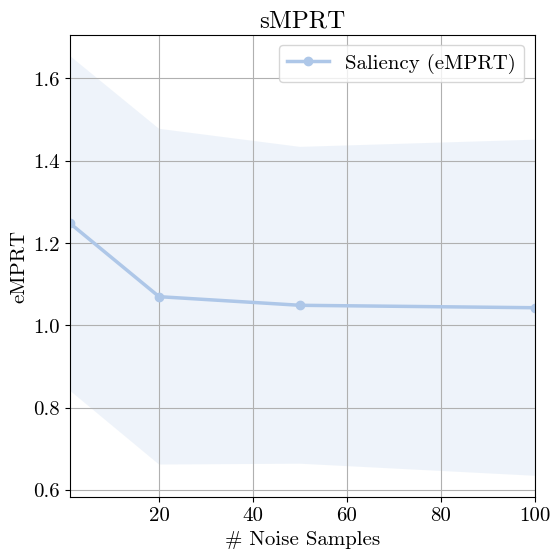

In [30]:
selection_filter = {"eval_metricname": "emprt"}
#plotted_xai_methods = ["gradient", "lrp-zplus"]
plotted_xai_methods = ["gradient"]

# Iterate through filters
selected_runs = select_runs(scores, selection_filter)
selected_runs = [(c, r) for c, r in selected_runs if c["xai_methodname"] in plotted_xai_methods]

for bpf in between_plot_filters:
    bpf_runs = select_runs(selected_runs, bpf)

    print(bpf)
    fname = f"smprt-noisedrawplot-imagenet"
    for k, v in bpf.items():
        fname += f"-{v}"
    filepath = os.path.join(figurepath, fname+".svg")
    plot_n_xaidraws_plot(bpf_runs, "delta_explanation_scores", "sMPRT", "eMPRT", within_plot_filters, filepath)